# DATA MINING - GRUPPO 2
## Diabets dataset
The aim of this project is to create a model to predict if
a patient will be readmitted or not after a specific encounter.

The first thing is to import the dataset

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
plt.style.use('ggplot')

df = pd.read_csv("dataset_diabetes/diabetic_data.csv", low_memory=False, delimiter=',', na_values='?')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


The dataset contains 101766 records with 50 columns. The columns
are:

In [33]:
print(df.columns.to_list())

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


Some informations about the column type and the null values

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Let's adjust the types

In [34]:
for attribute in df.columns:
    if df[attribute].dtype == np.object:
        df[attribute] = df[attribute].astype('category')

df['admission_type_id'] = df['admission_type_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      99493 non-null   category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   weight                    3197 non-null    category
 6   admission_type_id         101766 non-null  category
 7   discharge_disposition_id  101766 non-null  category
 8   admission_source_id       101766 non-null  category
 9   time_in_hospital          101766 non-null  int64   
 10  payer_code                61510 non-null   category
 11  medical_specialty         51817 non-null   category
 12  num_lab_procedures        101766 non-null  int64   
 13  num_procedures            101

Some columns contains null values, in particular

In [35]:
df.isna().apply(lambda x: f'{round((sum(x) / df.shape[0]) * 100, 1)}%')

encounter_id                 0.0%
patient_nbr                  0.0%
race                         2.2%
gender                       0.0%
age                          0.0%
weight                      96.9%
admission_type_id            0.0%
discharge_disposition_id     0.0%
admission_source_id          0.0%
time_in_hospital             0.0%
payer_code                  39.6%
medical_specialty           49.1%
num_lab_procedures           0.0%
num_procedures               0.0%
num_medications              0.0%
number_outpatient            0.0%
number_emergency             0.0%
number_inpatient             0.0%
diag_1                       0.0%
diag_2                       0.4%
diag_3                       1.4%
number_diagnoses             0.0%
max_glu_serum                0.0%
A1Cresult                    0.0%
metformin                    0.0%
repaglinide                  0.0%
nateglinide                  0.0%
chlorpropamide               0.0%
glimepiride                  0.0%
acetohexamide 

The most frequent value for the categorical attributes are:

In [29]:
df.describe(include='category').T

,count,unique,top,freq
race,99493,5,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,3197,9,[75-100),1336
admission_type_id,101766,8,1,53990
discharge_disposition_id,101766,26,1,60234
admission_source_id,101766,17,7,57494
payer_code,61510,17,MC,32439
medical_specialty,51817,72,InternalMedicine,14635
diag_1,101745,716,428,6862


The distribution for the numeric attribute

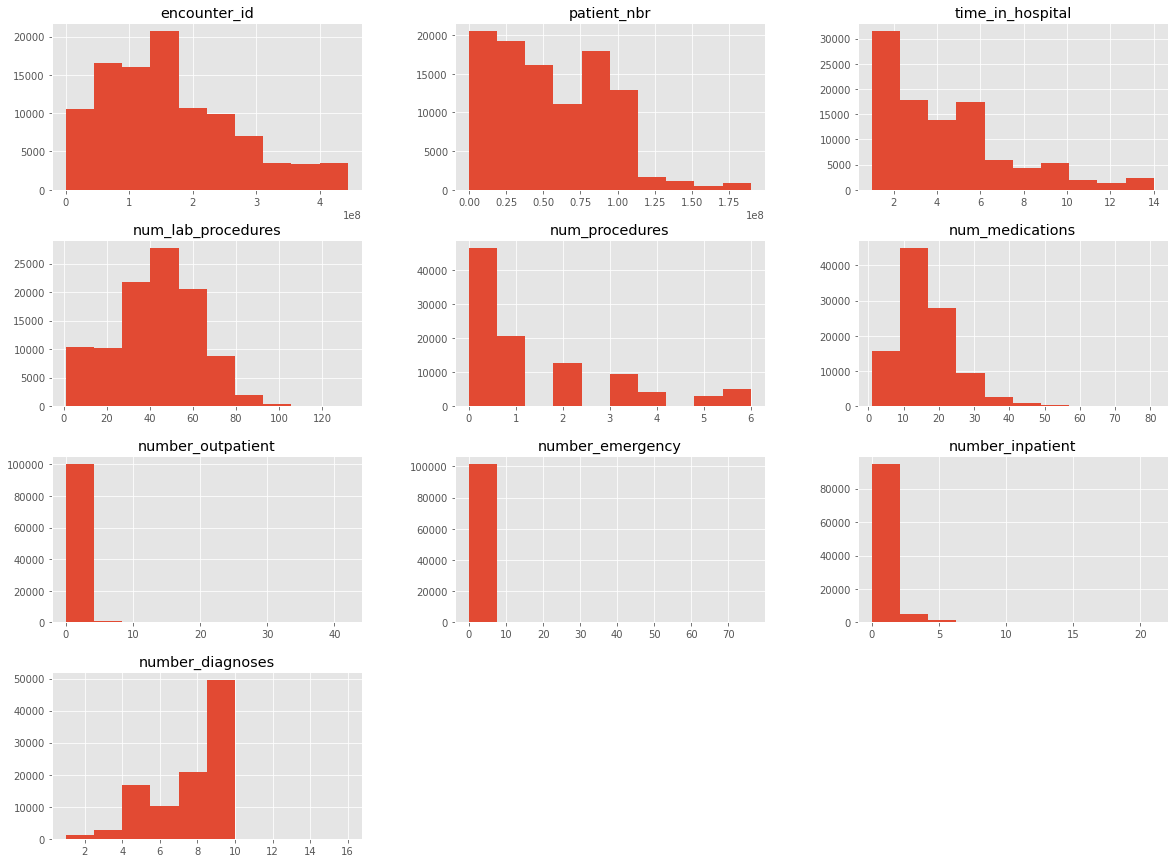

In [30]:
df.select_dtypes(include=['int64']).hist(figsize=(20,15))
plt.show()

About categorical attributes

In [ ]:
categorical_attr = df.select_dtypes(include=['category']).columns.to_list()
for attribute in categorical_attr:
    val = df[attribute].value_counts()
    val.plot(kind='bar', figsize=(10,5))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()

KeyboardInterrupt: 

How the numerical feature are correlated with the class labels

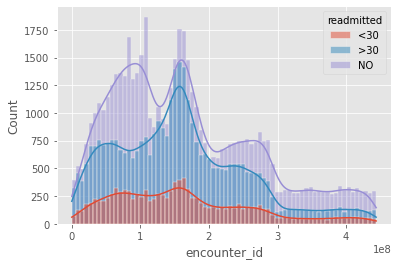

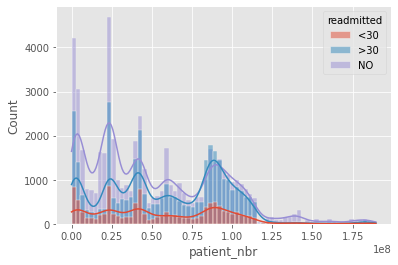

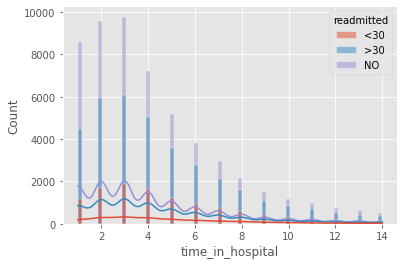

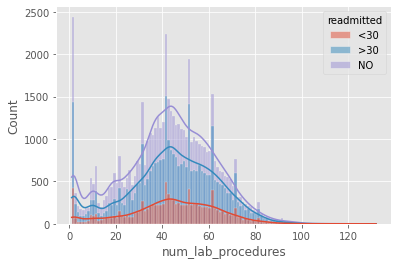

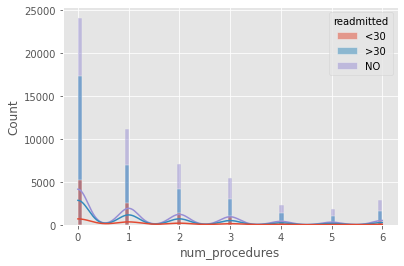

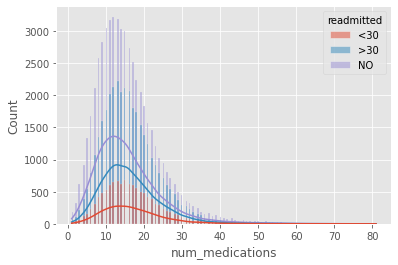

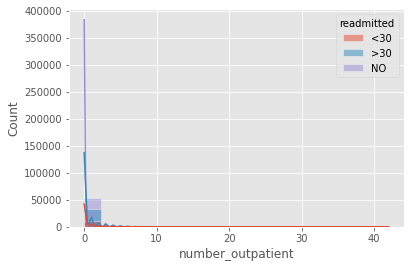

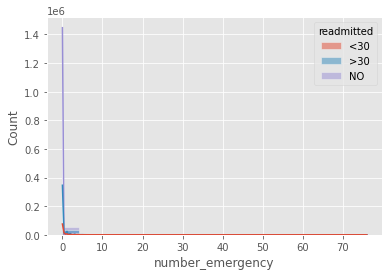

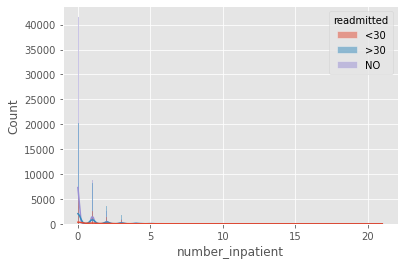

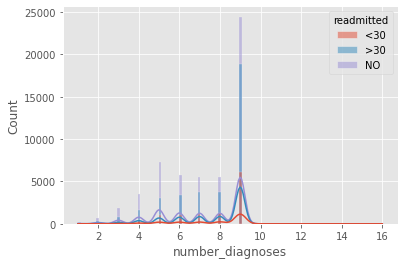

c:\users\mlori\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\mlori\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\mlori\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


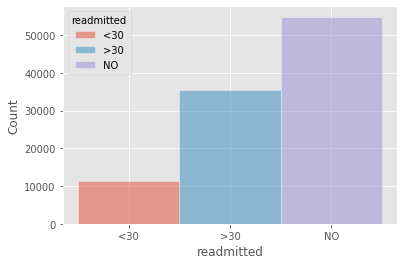

In [41]:
numericAttribute = df.select_dtypes(include=['int64']).columns.to_list()
numericAttribute.append('readmitted')

for attribute in numericAttribute:
    sb.histplot(x= df[attribute], hue= 'readmitted', data=df[numericAttribute], kde=True)
    plt.show()